# Release 0.6.0 Major feature now with Running race event results analytics!
> New release of runpandas comes with support of handling race event results.

- toc: false
- badges: true
- comments: true
- author: Marcel Caraciolo
- categories: [general, jupyter, releases]
- image: images/marathon.png

> This  current state of the project is `early beta`, which means that features can be added, removed or changed in backwards incompatible ways.

We published this major release with a great addition to our package, the support to race results analytics!  In this release of [RunPandas 0.6.0](https://pypi.org/project/runpandas/), we include:

-  Support to handling race event results pre-formatted files.
-  Access to a first open-data repository that it will include many marathon and race results available for runpandas.
-  Some race statistics such as winner details, split paces and race athlete demographics.

## What is Runpandas?


Runpandas is a python package based on ``pandas`` data analysis library, that makes it easier to perform data analysis from your running sessions stored at tracking files from cellphones and GPS smartwatches or social sports applications such as Strava, MapMyRUn, NikeRunClub, etc. It is designed to enable reading, transforming and running metrics analytics from several tracking files and apps. Since the release 0.6.0 it comes with the support of handling race event results, so we can analyze from race split times, finish times, demographics, etc. The goal is to support several many races results available to anyone interested in running race results analytics.


## Main Features


Runpandas is enabled now to handle and process race result events by reading a custom-prepared event result file. We know that fetching and preparing the datasets is not a trivial task. We will push and prepare some public results available from big races around the world to our [data repository],(https://github.com/corriporai/runpandas-data), so anyone can analyse with less effort his favorite race.

<img src="./images/race-event.png">

One of the goals is to provide access to many race event results as possible, so anyone might access it and analyse it! Feel free to explore it and help us with race event results.

In this tutorial, we will explore the results of the [Major marathons](https://www.worldmarathonmajors.com/), the *2022 Berlin Marathon* and analyze the performance of the WR record from this edition's winner Eliud Kipchoge.

### Race Overview

More than 30,000 people took the starting line for the 2022 Berlin Marathon, on 25 September 2022. An Elite Platinum Label Marathon, and one of the World marathon Majors. The race is quite famous for its fast and flat course, making it perfect for a record-setting day.

But this particular race also came with special flavours, with the participation of the top runners Eliud Kipchoge in the men's pro race and American record holder Keira D'Amato in the women's race. Kipchoge shattered his own world record with a time of 2:01:09 to win the Berlin marathon. It's the second time the Kenyan runner has set the official men's world record at the race in the German capital. Kipchoge's previous best in an official 42.2km race was 2:01:39 set on the same course in 2018.  His best non-official marathon's record is still the legendary two-hour mark during the 2019 Ineos 1:59 Challenge, where he set the quickest time in history when he ended the race in 1:59:40.

Ethiopia's Tigist Assefa won the women's race on Sunday in a course record of 2:15:37, the third fastest time in history.

<img src="./images/eliud_finish.png">


(Picture by GETTY IMAGES (GETTY IMAGES (Photographer) - [None] (GETTY IMAGES (GETTY IMAGES (Photographer) - [None] (Photographer) - [None])


### How does it work ?

First, let's load the Berlin Marathon data by using the runpandas method ``runpandas.get_events``. This function provides a way of accessing the race data and visualize the results from several running results available at our race datasets repository. Given the year and the marathon identifier you can filter any marathon datasets that you want analyze. The result will be a list of ``runpandas.EventData`` instances with race result and its metadata. Let's look for Berlin Marathon results.

In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import runpandas
import os
import pandas as pd
pd.set_option('display.max_rows', 500)

In [5]:
results = runpandas.get_events('Berlin')
results

[<Event: name=Berlin Marathon Results from 2022., country=DE, edition=2022>]

The result comes with the Berlin Marathon Result from 2022. Let's take a look inside the race event, which comes with a handful method to describe its attributes and a special method to load the race result data into a `runpandas.datasets.schema.RaceData` instance.

In [7]:
berlin_result = results[0]
print('Event type', berlin_result.run_type)
print('Country', berlin_result.country)
print('Year', berlin_result.edition)
print('Name', berlin_result.summary)
print('Attributes', berlin_result.included_data)

Event type RunTypeEnum.MARATHON
Country DE
Year 2022
Name Berlin Marathon Results from 2022.

Attributes [<RaceAttributeEnum.position: 'position'>, <RaceAttributeEnum.position_gender: 'position_gender'>, <RaceAttributeEnum.country: 'country'>, <RaceAttributeEnum.gender: 'gender'>, <RaceAttributeEnum.division: 'division'>, <RaceAttributeEnum.bib: 'bib'>, <RaceAttributeEnum.firstname: 'firstname'>, <RaceAttributeEnum.lastname: 'lastname'>, <RaceAttributeEnum.club: 'club'>, <RaceAttributeEnum.starttime: 'starttime'>, <RaceAttributeEnum.start_raw_time: 'start_raw_time'>, <RaceAttributeEnum.time_5K: '5K_time'>, <RaceAttributeEnum.time_10K: '10K_time'>, <RaceAttributeEnum.time_15K: '15K_time'>, <RaceAttributeEnum.time_20K: '20K_time'>, <RaceAttributeEnum.half_time: 'half_time'>, <RaceAttributeEnum.time_25K: '25K_time'>, <RaceAttributeEnum.time_30K: '30K_time'>, <RaceAttributeEnum.time_35K: '35K_time'>, <RaceAttributeEnum.time_40K: '40K_time'>, <RaceAttributeEnum.category: 'category'>, <RaceA

Now that we confirmed that we requested the corresponding marathon dataset. We will load it into a DataFrame so we can further explore it.

In [8]:
#loading the race data into a RaceData Dataframe
race_result = berlin_result.load()
race_result

,position,position_gender,country,sex,division,bib,firstname,lastname,club,starttime,...,10k,15k,20k,25k,30k,35k,40k,grosstime,nettime,category
0,1,1,KEN,M,1,1,Eliud,Kipchoge,–,09:15:00,...,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 01:11:08,0 days 01:25:40,0 days 01:40:10,0 days 01:54:53,0 days 02:01:09,0 days 02:01:09,M35
1,2,2,KEN,M,1,5,Mark,Korir,–,09:15:00,...,0 days 00:28:56,0 days 00:43:35,0 days 00:58:14,0 days 01:13:07,0 days 01:28:06,0 days 01:43:25,0 days 01:59:05,0 days 02:05:58,0 days 02:05:58,M30
2,3,3,ETH,M,1,8,Tadu,Abate,–,09:15:00,...,0 days 00:29:46,0 days 00:44:40,0 days 00:59:40,0 days 01:14:44,0 days 01:30:01,0 days 01:44:55,0 days 02:00:03,0 days 02:06:28,0 days 02:06:28,MH
3,4,4,ETH,M,2,26,Andamlak,Belihu,–,09:15:00,...,0 days 00:28:23,0 days 00:42:33,0 days 00:56:45,0 days 01:11:09,0 days 01:26:11,0 days 01:42:14,0 days 01:59:14,0 days 02:06:40,0 days 02:06:40,MH
4,5,5,KEN,M,3,25,Abel,Kipchumba,–,09:15:00,...,0 days 00:28:55,0 days 00:43:35,0 days 00:58:14,0 days 01:13:07,0 days 01:28:03,0 days 01:43:08,0 days 01:59:14,0 days 02:06:49,0 days 02:06:49,MH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35566,DNF,–,USA,M,–,65079,michael,perkowski,–,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M65
35567,DNF,–,USA,M,–,62027,Karl,Mann,–,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M55
35568,DNF,–,THA,F,–,27196,oraluck,pichaiwongse,STATE to BERLIN 2022,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,W55
35569,DNF,–,SUI,M,–,56544,Gerardo,GARCIA CALZADA,–,–,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,M50


Now you can get some insights about the Berlin Marathon 2022, by using its tailored methods for getting basic and quick insights. For example, the number of finishers, number of participants and the winner info.

In [9]:
print('Total participants', race_result.total_participants)
print('Total finishers', race_result.total_finishers)
print('Total Non-Finishers', race_result.total_nonfinishers)

Total participants 35571
Total finishers 34844
Total Non-Finishers 727


In [10]:
race_result.winner

position                         1
position_gender                  1
country                        KEN
sex                              M
division                         1
bib                              1
firstname                    Eliud
lastname                  Kipchoge
club                             –
starttime                 09:15:00
start_raw_time            09:15:00
half               0 days 00:59:51
5k                 0 days 00:14:14
10k                0 days 00:28:23
15k                0 days 00:42:33
20k                0 days 00:56:45
25k                0 days 01:11:08
30k                0 days 01:25:40
35k                0 days 01:40:10
40k                0 days 01:54:53
grosstime          0 days 02:01:09
nettime            0 days 02:01:09
category                       M35
Name: 0, dtype: object

Eliud Kipchoge of Kenya won the 2022 Berlin Marathon in 2:01:09. Kipchoge’s victory was his fourth in Berlin and 17th overall in a career of 19 marathon starts.  And who was the women's race winner?


In [11]:
race_result[(race_result['position_gender'] == 1) & (race_result['sex'] == 'F')].T

,32
position,33
position_gender,1
country,ETH
sex,F
division,1
bib,F24
firstname,Tigist
lastname,Assefa
club,–
starttime,09:15:00


Tigist Assefa of Ethiopia won the women’s race in a stunning time of 2:15:37 to set a new course record in Berlin. 

Runpandas also provides a race's summary method for showing the compilation of some general insights such as finishers, partipants (by gender and overall).

In [12]:
race_result.summary()

Event name                    berlin marathon
Event type                                42k
Event country                              DE
Event date                         25-09-2022
Number of participants                  35571
Number of finishers                     34844
Number of non-finishers                   727
Number of male finishers                23314
Number of female finishers              11523
Winner Nettime                0 days 02:01:09
dtype: object

### Analyzing Eliud Kipchoge results

Runpandas for some race results come with the splits for the partial distances of the race. We can fetch for any runner the splits using the method `runpandas.acessors.splits.pick_athlete`. So, if we need to have direct access to all splits from a specific runner, we will use the splits acesssor.


In [18]:
race_result.splits.pick_athlete(identifier='1')


,time,distance_meters,distance_miles
split,,,
0k,0 days 00:00:00,0,0.0000
5k,0 days 00:14:14,5000,3.1069
10k,0 days 00:28:23,10000,6.2137
15k,0 days 00:42:33,15000,9.3206
20k,0 days 00:56:45,20000,12.4274
half,0 days 00:59:51,21097,13.1091
25k,0 days 01:11:08,25000,15.5343
30k,0 days 01:25:40,30000,18.6411
35k,0 days 01:40:10,35000,21.7480


With plotting libraries such as matplotlib you can analyze Eliud's splits timing data through a impressive visualization!



In [25]:
eliud_kipchoge_splits = race_result.splits.pick_athlete(identifier='1')


First, let's compute some support metrics to improve our analysis such as the overall mean pace and the pace per each segment i.e (5km, 10km, and so on).

In [30]:
import numpy as np
#compute the distance ellapsed per segment , and convert it to kms
dist_diff = (eliud_kipchoge_splits["distance_meters"] /1000).diff().fillna(eliud_kipchoge_splits['distance_meters'][0])
#compute the time ellapsed per segment in seconds
time_diff = eliud_kipchoge_splits['time'].diff().fillna(eliud_kipchoge_splits['time'][0])  / np.timedelta64(1, "s")
#compute the speed by dividing the split distance and the split time ellapsed and convert it back to timedelta
speed = dist_diff / time_diff
pace_timedelta = pd.to_timedelta(1 / speed, unit="s")
eliud_kipchoge_splits['pace'] = pace_timedelta
eliud_kipchoge_splits['time_split'] = pd.to_timedelta(time_diff, unit='s')
eliud_kipchoge_splits['mean_pace'] = eliud_kipchoge_splits['pace'].mean()

eliud_kipchoge_splits

,time,distance_meters,distance_miles,pace,time_split,mean_pace
split,,,,,,
0k,0 days 00:00:00,0,0.0000,NaT,0 days 00:00:00,0 days 00:02:52.030804837
5k,0 days 00:14:14,5000,3.1069,0 days 00:02:50.800000,0 days 00:14:14,0 days 00:02:52.030804837
10k,0 days 00:28:23,10000,6.2137,0 days 00:02:49.800000,0 days 00:14:09,0 days 00:02:52.030804837
15k,0 days 00:42:33,15000,9.3206,0 days 00:02:50,0 days 00:14:10,0 days 00:02:52.030804837
20k,0 days 00:56:45,20000,12.4274,0 days 00:02:50.400000,0 days 00:14:12,0 days 00:02:52.030804837
half,0 days 00:59:51,21097,13.1091,0 days 00:02:49.553327256,0 days 00:03:06,0 days 00:02:52.030804837
25k,0 days 01:11:08,25000,15.5343,0 days 00:02:53.456315655,0 days 00:11:17,0 days 00:02:52.030804837
30k,0 days 01:25:40,30000,18.6411,0 days 00:02:54.400000,0 days 00:14:32,0 days 00:02:52.030804837
35k,0 days 01:40:10,35000,21.7480,0 days 00:02:54,0 days 00:14:30,0 days 00:02:52.030804837


In [31]:
#remove the 0k from the frame, since it doesn't give us any useful information.
eliud_race_results_filtered = eliud_kipchoge_splits.iloc[1:]

Finally let's plot the Eliud's performance (timing and pace) for each segment using the line chart visualization.

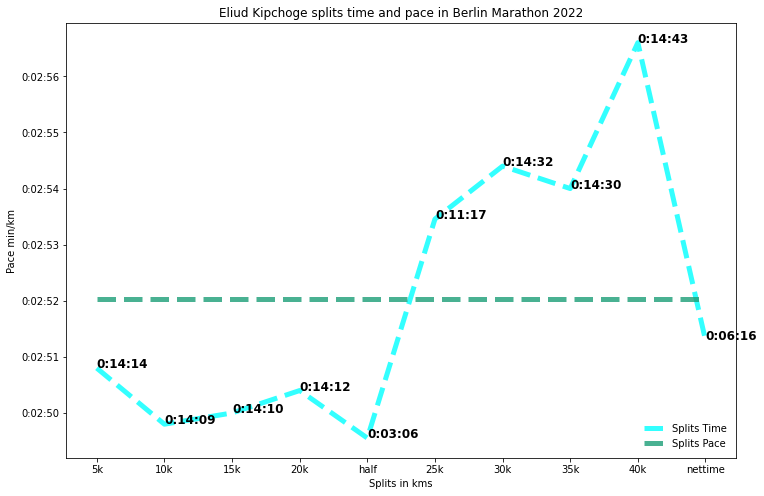

In [37]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import datetime


plt.rcParams['figure.figsize'] = [12, 8]


def timeTicks(x, pos):
    seconds = x / 10**9
    d = datetime.timedelta(seconds=seconds)
    return str(d)

fig, ax2 = plt.subplots()
#plot the splits time
#format the y-axis to show the labels as timedelta.
formatter = ticker.FuncFormatter(timeTicks)
#plot the paces per segment
line2, = ax2.plot(eliud_race_results_filtered.index, eliud_race_results_filtered['pace'],  linestyle='dashed', color='cyan',  lw=5, alpha=0.8)
#plot the overall mean pace
line3, = ax2.plot(eliud_race_results_filtered.index, eliud_race_results_filtered['mean_pace'], color='#1b9e77', linestyle='dashed',  lw=5, alpha=0.8)

#annotate the pace line with time splits
yvalues = line2.get_ydata()
for index, y in zip(eliud_race_results_filtered.index, yvalues):
    formated_time = datetime.timedelta(seconds=eliud_race_results_filtered.loc[index,'time_split'].total_seconds())
    ax2.text(index, y, formated_time, weight="bold", size=12,   )

ax2.yaxis.set_major_formatter(formatter)

ax2.grid(False)

ax2.legend(
            (line2, line3),
            ('Splits Time', 'Splits Pace', 'Mean Pace'),
            loc='lower right',
            frameon=False
)


ax2.set_title("Eliud Kipchoge splits time and pace in Berlin Marathon 2022")
ax2.set_xlabel("Splits in kms")
ax2.set_ylabel("Pace min/km")

plt.show()

Kipchoge’s  5km at the Berlin Marathon was completed in 14:14  and with a second 5km run at 14:09 and a third 5k split of 14:10, Kipchoge reached the 20km mark in a time of 00:14:1. It was just after the halfway mark in the Berlin Marathon that Kipchoge began to drift away from his previous pace. He started to slow down, with his time between 20 and 25km was 14:23. THe pace chart also shows his pace increasing from 02:50 to 02:53.  At 30 and 35km, Kipchoge’s delivered times of 14:32 at 30km and 14:30 at 35km in the Berlin Marathon. Between kilometres 35 and 40, Kipchoge was averaging 02:57 per kilometre, compared to his early race averages of 02:50, and his 40km split of 14:43 was 33 seconds slower than his best 5k during the race.

However, with a final burst, his pace increased over the final 2.195km of the race, as he posted an average time of =~ 2:52 per kilometre, just two seconds slower than his fastest average kilometre times in the race. Even with his second half positive split,  it’s difficult to argue against this Berlin Marathon 2022 run being the greatest of his already legendary career.

## What is coming next ?

The next releases will focus on courses profile from GPX files and neat plotting features!

## Sorry

Sorry for the long delay since the last release, I was kept busy working on other projects. This major one release took a lot of time!

## Thanks

We are constantly developing Runpandas improving its existing features and adding new ones. We will be glad to hear from you about what you like or don’t like, what features you may wish to see in upcoming releases. Please feel free to contact us.